In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fruit=pd.read_csv(r'C:\Users\SAYAN\Desktop\knn_fruit_data_with_colors.csv')

In [3]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
predict=dict(zip(fruit.fruit_label.unique(),fruit.fruit_name.unique()))

In [5]:
predict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
apple_data=fruit[fruit['fruit_label']==1]

In [7]:
apple_data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69


In [8]:
lemon_data=fruit[fruit['fruit_label']==4]

In [9]:
lemon_data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72
48,4,lemon,spanish_belsan,174,7.3,10.1,0.72
49,4,lemon,unknown,132,5.8,8.7,0.73
50,4,lemon,unknown,130,6.0,8.2,0.71
51,4,lemon,unknown,116,6.0,7.5,0.72
52,4,lemon,unknown,118,5.9,8.0,0.72


In [10]:
len(lemon_data.index)

16

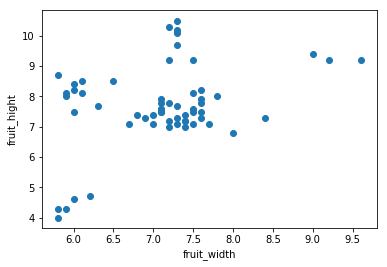

In [11]:
plt.scatter(fruit['width'],fruit['height'])
plt.xlabel('fruit_width')
plt.ylabel('fruit_hight')
plt.show()

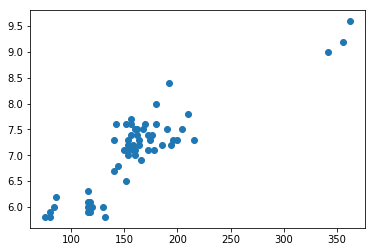

In [12]:
plt.scatter(fruit['mass'],fruit['width'])

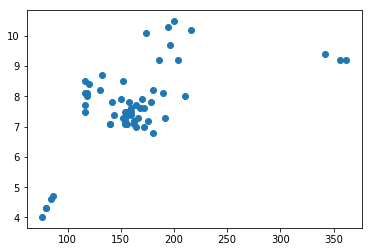

In [13]:
plt.scatter(fruit['mass'],fruit['height'])

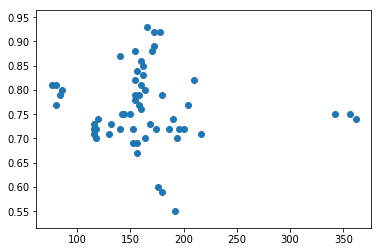

In [14]:
plt.scatter(fruit['mass'],fruit['color_score'])

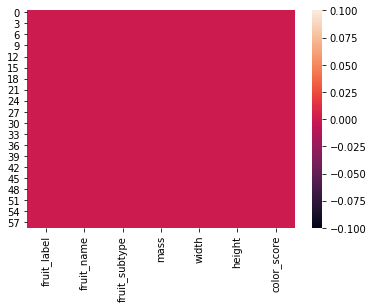

In [15]:
#Data cleaning
import seaborn as sns
fruit.isnull().sum()
sns.heatmap(fruit.isnull())

In [16]:
x=fruit[['mass','width','height']].values
y=fruit['fruit_label'].values

In [17]:
x


array([[192. ,   8.4,   7.3],
       [180. ,   8. ,   6.8],
       [176. ,   7.4,   7.2],
       [ 86. ,   6.2,   4.7],
       [ 84. ,   6. ,   4.6],
       [ 80. ,   5.8,   4.3],
       [ 80. ,   5.9,   4.3],
       [ 76. ,   5.8,   4. ],
       [178. ,   7.1,   7.8],
       [172. ,   7.4,   7. ],
       [166. ,   6.9,   7.3],
       [172. ,   7.1,   7.6],
       [154. ,   7. ,   7.1],
       [164. ,   7.3,   7.7],
       [152. ,   7.6,   7.3],
       [156. ,   7.7,   7.1],
       [156. ,   7.6,   7.5],
       [168. ,   7.5,   7.6],
       [162. ,   7.5,   7.1],
       [162. ,   7.4,   7.2],
       [160. ,   7.5,   7.5],
       [156. ,   7.4,   7.4],
       [140. ,   7.3,   7.1],
       [170. ,   7.6,   7.9],
       [342. ,   9. ,   9.4],
       [356. ,   9.2,   9.2],
       [362. ,   9.6,   9.2],
       [204. ,   7.5,   9.2],
       [140. ,   6.7,   7.1],
       [160. ,   7. ,   7.4],
       [158. ,   7.1,   7.5],
       [210. ,   7.8,   8. ],
       [164. ,   7.2,   7. ],
       [19

In [18]:
y


array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [19]:
#train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [20]:
x_train

array([[158. ,   7.1,   7.5],
       [180. ,   7.6,   8.2],
       [190. ,   7.5,   8.1],
       [154. ,   7.2,   7.2],
       [174. ,   7.3,  10.1],
       [ 76. ,   5.8,   4. ],
       [152. ,   7.6,   7.3],
       [164. ,   7.2,   7. ],
       [132. ,   5.8,   8.7],
       [160. ,   7. ,   7.4],
       [154. ,   7.3,   7.3],
       [116. ,   5.9,   8.1],
       [162. ,   7.5,   7.1],
       [116. ,   6.3,   7.7],
       [204. ,   7.5,   9.2],
       [156. ,   7.7,   7.1],
       [ 80. ,   5.8,   4.3],
       [210. ,   7.8,   8. ],
       [156. ,   7.6,   7.5],
       [130. ,   6. ,   8.2],
       [160. ,   7.5,   7.5],
       [116. ,   6. ,   7.5],
       [178. ,   7.1,   7.8],
       [164. ,   7.3,   7.7],
       [356. ,   9.2,   9.2],
       [168. ,   7.5,   7.6],
       [118. ,   6.1,   8.1],
       [152. ,   6.5,   8.5],
       [118. ,   5.9,   8. ],
       [158. ,   7.2,   7.8],
       [180. ,   8. ,   6.8],
       [154. ,   7. ,   7.1],
       [186. ,   7.2,   9.2],
       [34

In [21]:
x_test

array([[362. ,   9.6,   9.2],
       [150. ,   7.1,   7.9],
       [194. ,   7.2,  10.3],
       [140. ,   6.7,   7.1],
       [172. ,   7.1,   7.6],
       [176. ,   7.4,   7.2],
       [142. ,   7.6,   7.8],
       [216. ,   7.3,  10.2],
       [154. ,   7.1,   7.5],
       [140. ,   7.3,   7.1],
       [ 84. ,   6. ,   4.6],
       [166. ,   6.9,   7.3]])

In [22]:
y_test

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1], dtype=int64)

In [23]:
y_train

array([3, 3, 3, 3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4,
       1, 1, 3, 1, 4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1,
       4, 4, 4], dtype=int64)

In [24]:
#KNN model creation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
#accuracy check of the model
knn.score(x_test,y_test)*100


58.333333333333336

In [26]:
#prediction of the model
pred=knn.predict(x_test)

In [27]:
pred

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1], dtype=int64)

In [28]:
#prediction of the model foem out side input
z=knn.predict([[200,7.6,6]])
print(z)
predict[z[0]]

[3]


'orange'

In [29]:
z=knn.predict([[300,4.6,8]])
print(z)
predict[z[0]]

[3]


'orange'

In [30]:
data=pd.DataFrame({'Actual':y_test,'Predicted':pred})

In [31]:
data

,Actual,Predicted
0,3,3
1,3,1
2,4,4
3,3,4
4,1,1
5,1,1
6,3,3
7,4,3
8,3,1
9,1,4


In [32]:
# making the confution metric
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[3 0 0 1]
 [0 1 0 0]
 [2 0 2 1]
 [0 0 1 1]]


0.5833333333333334